# Sharpe Ratio shifted strategy


In this project, I will evaluate the validity of high-performing stocks from the Eurostoxx 50 index over the past five years. Each month, the top-performing stocks will be selected and their mean returns in the following month will be analyzed. This retrospective analysis aims to assess their subsequent performance and potential benefits based on historical data from inmidiate high-performing values.

The aim of the project is purely verificational, focusing on assessing the validity of one of the simplest trading strategies driven by high short-term past returns.

In [169]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Stock data retrieval yahoo finance


In [170]:

from datetime import date
from datetime import timedelta
tickers = ["ABI.BR", "ADS.DE", "AI.PA", "AIR.PA", "ALV.DE", "ASML.AS", "CS.PA", "BAS.DE", 
    "BAYN.DE", "BBVA.MC", "BMW.DE", "BNP.PA", "BN.PA", "DB1.DE", "DTE.DE", 
    "DPWA.F", "ENEL.MI", "ENI.MI", "EL.PA", "RACE.MI", "IBE.MC", "ITX.MC", 
    "IFX.DE", "INGA.AS", "ISP.MI", "KER.PA", "OR.PA", "MC.PA", "MBG.DE", 
    "MUV2.DE", "NOKIA.HE", "NDA-SE.ST", "RI.PA", "PRX.AS", "SAF.PA", 
    "SGO.PA", "SAN.PA", "SAN.MC", "SAP.DE", "SU.PA", "SIE.DE", 
    "STLAM.MI", "TTE.PA", "UCG.MI", "DG.PA", "VIV.PA", 
    "VOW3.DE", "WKL.AS","^STOXX50E"] #Eurostoxx 50 tickers

end_date = date.today()
start_date = end_date - timedelta(days = 1825) #Time interval
adj_close_df = pd.DataFrame() 
for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    adj_close_df[ticker] = data['Adj Close'] #Dataframe with stock index closed prices
        
adj_close_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ABI.BR,ADS.DE,AI.PA,AIR.PA,ALV.DE,ASML.AS,CS.PA,BAS.DE,BAYN.DE,BBVA.MC,...,SU.PA,SIE.DE,STLAM.MI,TTE.PA,UCG.MI,DG.PA,VIV.PA,VOW3.DE,WKL.AS,^STOXX50E
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-17,67.387070,276.694611,93.369965,127.040268,171.213867,251.539520,18.854120,48.673477,59.682419,3.784605,...,82.692253,91.757797,8.643384,35.425575,10.846004,83.142609,8.355862,111.075294,58.795952,3745.280029
2019-12-18,68.210129,279.346741,93.557701,126.286736,170.060104,252.113358,18.876690,48.507004,60.346878,3.819842,...,82.279953,90.702400,8.647197,35.298500,10.893530,82.049507,8.332833,110.204346,58.483494,3739.000000
2019-12-19,68.276352,278.093018,93.933121,126.383354,168.406418,249.722290,18.839075,48.702427,60.491703,3.864076,...,82.100700,91.136963,8.645926,35.581696,11.057417,81.881340,8.355862,108.621948,58.814331,3739.169922
2019-12-20,70.064377,281.082703,95.284676,127.407402,169.790909,253.069839,19.113684,49.172874,60.909115,3.855080,...,82.799805,91.680191,8.676437,35.632530,11.029555,83.563011,8.500608,108.536087,60.192776,3776.560059
2019-12-23,70.244133,280.745178,94.946793,128.276871,169.675552,254.791412,19.102398,48.883369,62.698063,3.816094,...,82.728104,91.199051,8.584905,35.839478,10.931225,83.748001,8.530215,108.045403,60.008991,3776.659912


We compute the returns, variance and Sharpe ratio for each month. We will use the mean_variance dataframe to prove if our strategy is valid.

In [171]:
# Calculate daily percentage changes (returns)
pctge_returns = adj_close_df.pct_change()

# Risk free rate
risk_free_rate=0.02/252

# Step 1: Compute daily excess returns
returns=pctge_returns-risk_free_rate

# Extract month and year from the index and add as columns
returns["month"] = pd.to_datetime(returns.index).month
returns["year"] = pd.to_datetime(returns.index).year

# Group data by year and month, calculating mean and variance of returns
mean_var = returns.groupby(["year", "month"]).agg(["mean", "std"])

# Calculate Sharpe ratio for each stock: (mean return - Eurostoxx returns)*trading days in a month / monthly variance of excess returns
for j in returns.drop(["month", "year"], axis=1).columns:
    mean_var.loc[:, (j, "Sharpe")] = (mean_var[j]["mean"]-risk_free_rate)*np.sqrt(21) / (mean_var[j]["std"])

mean_var.head()

ABI.BR              ADS.DE               AI.PA            \
                mean       std      mean       std      mean       std   
year month                                                               
2019 12     0.002563  0.012592  0.001199  0.006807  0.001789  0.006806   
2020 1     -0.002784  0.010756 -0.000589  0.015950  0.001569  0.008864   
     2     -0.014464  0.030259 -0.006461  0.019229 -0.003031  0.017038   
     3     -0.007626  0.074157 -0.007558  0.053784 -0.001440  0.045459   
     4      0.002330  0.038162  0.001201  0.031994 -0.000042  0.023979   

              AIR.PA              ALV.DE            ...     SU.PA    SIE.DE  \
                mean       std      mean       std  ...    Sharpe    Sharpe   
year month                                          ...                       
2019 12    -0.001004  0.010481 -0.002441  0.006128  ... -0.976502 -1.124863   
2020 1      0.000999  0.016243 -0.000560  0.010512  ... -0.227112 -0.715290   
     2     -0.010234  0.022501 -0.005001  0.020123  ...  0.009721 -2.222775   
     3     -0.021796  0.103803 -0.007848  0.064923  ... -0.435698 -0.584485   
     4      0.000258  0.057502  0.003995  0.028528  ...  0.437596  0.644011   

            STLAM.MI    TTE.PA    UCG.MI     DG.PA    VIV.PA   VOW3.DE  \
              Sharpe    Sharpe    Sharpe    Sharpe    Sharpe    Sharpe   
year month                                                               
2019 12    -2.518256  0.972231 -1.048712  0.017782  1.253601 -2.955000   
2020 1     -2.239143 -1.830581 -0.922733  0.184981 -1.078658 -1.059128   
     2     -0.387566 -1.786040 -0.315117 -1.228776 -1.249165 -0.913305   
     3     -1.392944  0.010283 -1.269192 -0.344563 -0.613084 -0.782638   
     4      1.362710 -0.460228 -0.030230  0.129341  0.726299  0.936989   

              WKL.AS ^STOXX50E  
              Sharpe    Sharpe  
year month                      
2019 12     0.792978 -0.036363  
2020 1      0.859969 -0.750858  
     2     -0.337091 -1.249341  
     3     -0.099366 -0.700103  
     4      0.745204  0.492780  

[5 rows x 147 columns]

### Top Sharpe ratio stocks by month

Now, we calculate the top N values based on the Sharpe ratio. Alternatively, rankings could be based on variance or mean returns if needed.

In [172]:
# Choose top n stocks for each month form the index
n=4

# Compute top company´s from each month
top_n=mean_var.loc[:, (slice(None), "Sharpe")].apply(lambda x:
                                                   x.nlargest(n).index.get_level_values(0).tolist(),axis=1)
top_n_columns_df = pd.DataFrame(top_n.tolist(), index=mean_var.index, columns=[f'Top{i}_Column' for i in range(1,n+1)])

# Top Sharpe ratio´s from each month
top_n_returns = pd.DataFrame(top_n_columns_df.apply(lambda row: [mean_var.loc[row.name, (row[f'Top{i}_Column'], 'Sharpe')] for i in range(1, n+1)], axis=1).to_list(),
                             index=mean_var.index,columns=[f'Top{i}_Column' for i in range(1, n+1)])

# Dataframe with top N stocks mean Sharpe ratio 
mean_return_values=pd.DataFrame(
    top_n_returns.apply(lambda x: np.mean(x), axis=1).to_list(),
    index=top_n_returns.index,
    columns=[" "]  # Adjust column names as needed
)

# Unstack the dataframe to plot 
mean_values=mean_return_values.unstack(level=1)

The following plots display the distribution of the top 4 stocks by Sharpe ratio and the average Sharpe ratio of these stocks.

A Sharpe ratio greater than 1 is generally regarded as favorable by investors. Given that we are analyzing an index comprising major European companies and focusing on those with the highest Sharpe ratios, we expect to observe predominantly positive values greater than 1.

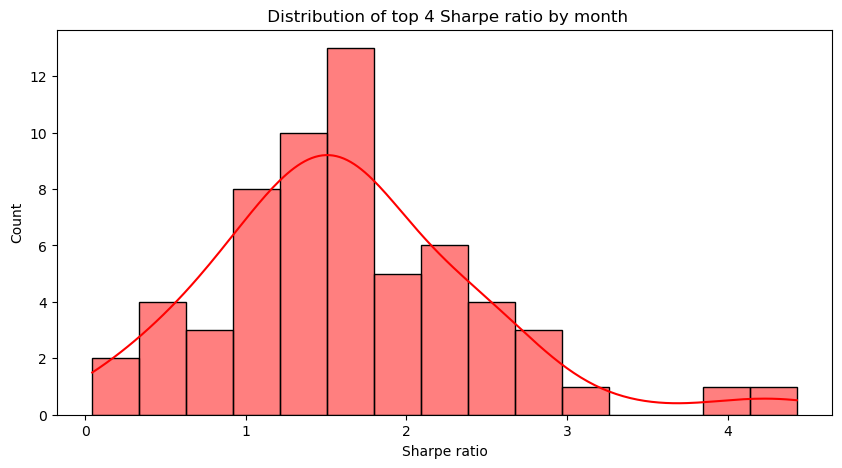

In [173]:
plt.figure(figsize=(10,5))
sns.histplot(data=mean_return_values,x=" ",color="red",kde=True,bins=15)
plt.xlabel("Sharpe ratio")
plt.title( f' Distribution of top {n} Sharpe ratio by month')
plt.show()
          

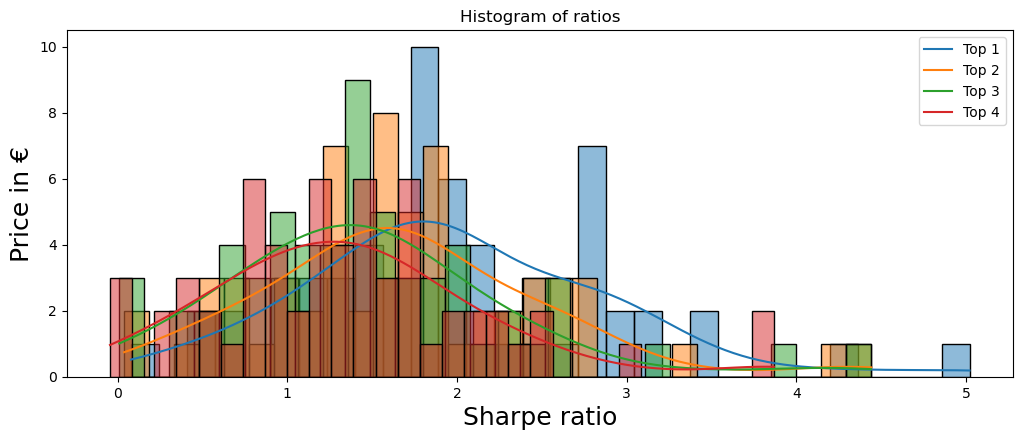

In [182]:
plt.figure(figsize=(12.2,4.5)) 
for i in top_n_returns.columns.values:
    sns.histplot(x=i,data=top_n_returns,  label=i, bins = 30,kde=True)
plt.title('Histogram of ratios')
plt.xlabel('Sharpe ratio',fontsize=18)
plt.ylabel('Price in €',fontsize=18)
plt.legend([f'Top {i}' for i in range(1,n+1)])
plt.show()


This heatmap displays the Sharpe ratios for different months over the past five years. We observe that the predominant values for this ratio among top enterprises typically range between 1 and 2.

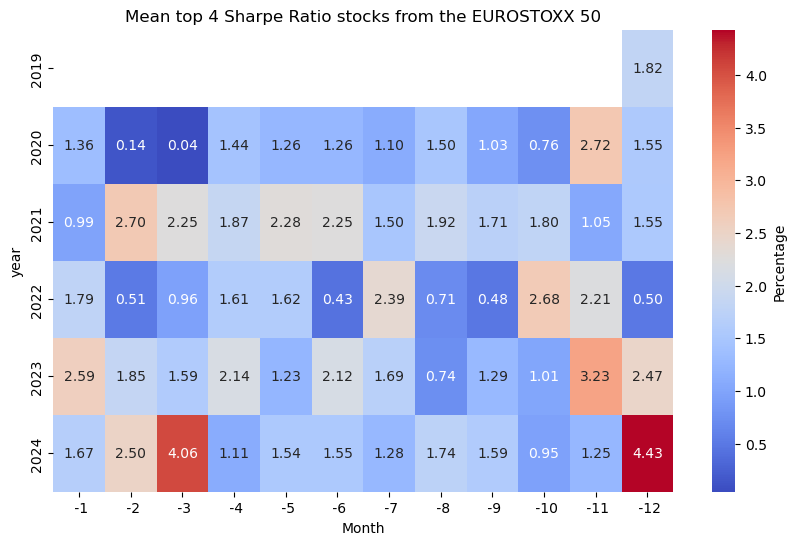

In [183]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    mean_values ,fmt=".2f",  # Convertir valores a porcentaje
    annot=True,          # Mostrar valores en las celdas         
    cmap="coolwarm",     # Paleta de colores
    cbar_kws={'label': 'Percentage'}
)
plt.xlabel("Month")
plt.title( f'Mean top {n} Sharpe Ratio stocks from the EUROSTOXX 50')
plt.show()

### Top Sharpe ratio stocks lagged one month


Now, let's analyze how the top N stocks perform one month after reaching the highest position in our ranking. We shift all the data by a one-month forward lag to evaluate their subsequent performance.

This "strategy" could be thought as a momentum strategy. We reckon the specific value of the stock might raise due to the good results obtained in recent times based on an specifi indicator.


In [176]:
# Shift the top N values with a one month lag forward
top_n_columns_shift = top_n_columns_df.shift(1)

# Compute the shifted returns directly
top_n_returns_shift = pd.DataFrame(
    [
        [
            mean_var.loc[idx, (row[f'Top{i}_Column'], 'Sharpe')]
            if pd.notna(row[f'Top{i}_Column']) and (row[f'Top{i}_Column'], 'Sharpe') in mean_var.columns
            else np.nan
            for i in range(1, n+1)
        ]
        for idx, row in top_n_columns_shift.iterrows()
    ],
    index=mean_var.index, # Year-Month index
    columns=[f'Top{i}_Return' for i in range(1, n+1)]
)


In [177]:
#Create mean top N returns Dataframe
mean_return_values_shifted=pd.DataFrame(
    top_n_returns_shift.apply(lambda x: np.mean(x), axis=1).to_list(),
    index=top_n_returns_shift.index,
    columns=[" "]  # Adjust column names as needed
)
mean_values_shifted=mean_return_values_shifted.unstack(level=1)


As observed, the strategy yields poor results, with the Sharpe ratios dropping significantly over the last five years. Additionally, some periods show negative values, indicating that the top stocks fail to outperform the benchmark, which is set at a standard risk-free rate of 2%.


In [178]:
print(f'Mean value of the Sharpe ratio for the shifted top {n} is {np.mean(mean_values_shifted[" "])}')
print(f'Percentage of months with a shifted Sharpe ratio above 0 {(mean_return_values_shifted[" "] > 0).mean() * 100} %') #Positive

Mean value of the Sharpe ratio for the shifted top 4 is 0.17968807572006448
Percentage of months with a shifted Sharpe ratio above 0 60.65573770491803 %


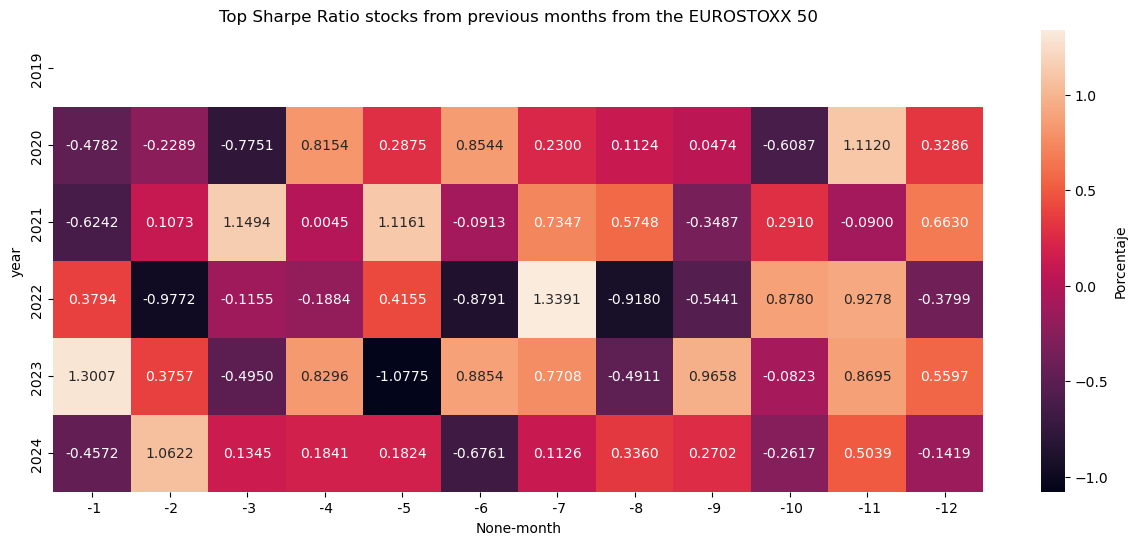

In [179]:
plt.figure(figsize=(15, 6))

sns.heatmap(
    mean_values_shifted,fmt=".4f",  # Convertir valores a porcentaje
    annot=True,          # Mostrar valores en las celdas              # Paleta de colores
    cbar_kws={'label': 'Porcentaje'}
)
plt.title("Top Sharpe Ratio stocks from previous months from the EUROSTOXX 50")
plt.show()

The distribution of ratios seems to be centered a little higher than 0, however as we have proved almost half of the excess returns seem negative since their ratios are negative, an indicator that the strategy is not completely succesful 

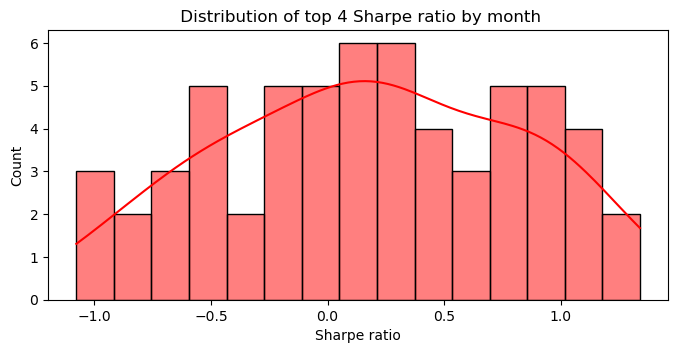

In [180]:
plt.figure(figsize=(8,3.5))
sns.histplot(data=mean_return_values_shifted,x=" ",color="red",kde=True,bins=15)
plt.xlabel("Sharpe ratio")
plt.title( f' Distribution of top {n} Sharpe ratio by month')
plt.show()
          

Here, we observe the behavior of the returns. The percentage of positive returns is above 50%, which is a favorable sign. However, the strategy alone is not strong enough to be implemented in practice (at least for the Eurostoxx 50). To improve its effectiveness, additional indicators would need to be used simultaneously to increase the confidence in such investments


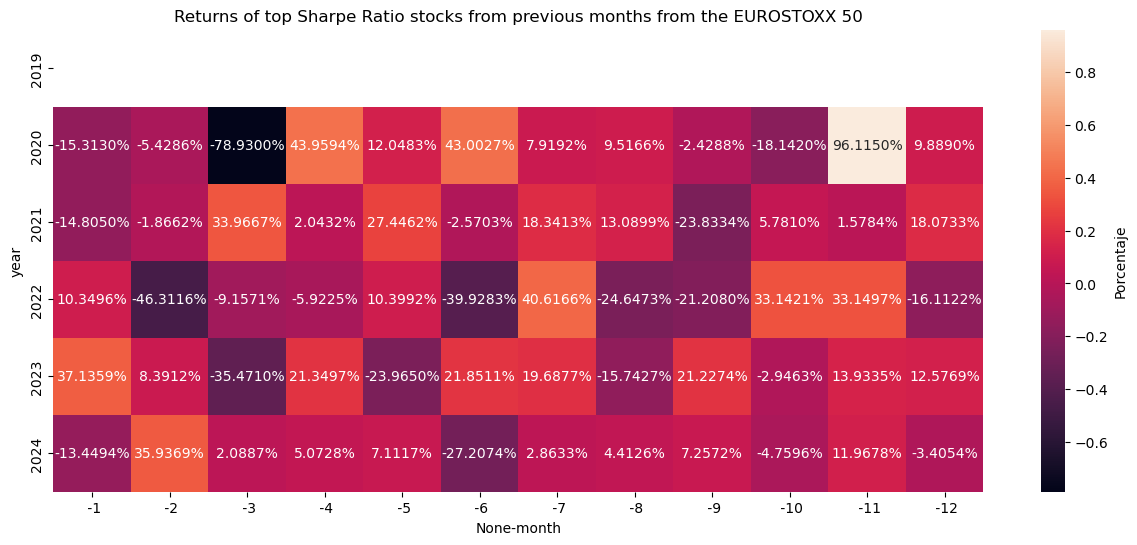

Mean value of returns for the shifted top 4 ratios is 0.04162342429287988 %
Percentage of months with positive returns 59.01639344262295 %


In [188]:
# Shift the top N values with a one month lag forward
top_n_columns_shift = top_n_columns_df.shift(1)

# Compute the shifted returns directly
top_n_returns_shift = pd.DataFrame(
    [
        [
            mean_var.loc[idx, (row[f'Top{i}_Column'], 'mean')]
            if pd.notna(row[f'Top{i}_Column']) and (row[f'Top{i}_Column'], 'mean') in mean_var.columns
            else np.nan
            for i in range(1, n+1)
        ]
        for idx, row in top_n_columns_shift.iterrows()
    ],
    index=mean_var.index, # Year-Month index
    columns=[f'Top{i}_Return' for i in range(1, n+1)]
)

#Create mean top N returns Dataframe
mean_return_values_shifted=pd.DataFrame(
    top_n_returns_shift.apply(lambda x: np.mean(x), axis=1).to_list(),
    index=top_n_returns_shift.index,
    columns=[" "]  # Adjust column names as needed
)
mean_values_shifted=mean_return_values_shifted.unstack(level=1)

plt.figure(figsize=(15, 6))

sns.heatmap(
    mean_values_shifted*100,fmt=".4%",  # Convertir valores a porcentaje
    annot=True,          # Mostrar valores en las celdas              # Paleta de colores
    cbar_kws={'label': 'Porcentaje'}
)
plt.title("Returns of top Sharpe Ratio stocks from previous months from the EUROSTOXX 50")
plt.show()
print(f'Mean value of returns for the shifted top {n} ratios is {np.mean(mean_values_shifted[" "])*100} %')
print(f'Percentage of months with positive returns {(mean_return_values_shifted[" "] > 0).mean() * 100} %') #Positive